In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [13]:
#Gradient Discent
def Decay_GD(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    count = 0                      #A counter to see how many times the iteration ran
    l_list = []
    w_list = []
    b_list = []
    w_cache,b_cache = w,b          #Caches for current epoch
    w_prev,b_prev = 0,0            #Contain previous parameters
    points,epoch_val = 0,0
    prev_loss,current_loss = 100,0 #High Value for first previous loss
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    while (epoch_val <= epochs):
        count += 1
        dw,db = 0,0
        w_prev, b_prev = w_cache,b_cache
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w_cache,b_cache)
                db += grad_b_mse(x[j],y[j],w_cache,b_cache)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w_cache,b_cache)
                db += grad_b_cross(x[j],y[j],w_cache,b_cache)
            points += 1
            if(points % batch_size == 0):
                w_cache = w_cache - lr*dw
                b_cache = b_cache - lr*db
                dw,db = 0,0
        if (loss == 'mse'):     
            current_loss = mse(x,y,w_cache,b_cache)[0]
        elif (loss == 'cross_entropy'):
            current_loss = cross_entropy(x,y,w_cache,b_cache)[0]
        #Successful Epoch
        if (current_loss < prev_loss):
            epoch_val += 1              
            prev_loss = current_loss
            #Load the new updates of parameters
            print('Loss after {}th epoch = {}\n'.format(epoch_val,current_loss))
            l_list.append(current_loss)
            w_list.append(w_cache[0])
            b_list.append(b_cache[0])
        elif (current_loss >= prev_loss):
            lr = lr/2
            w_cache,b_cache = w_prev,b_prev
    print('\n\nDecaying Learning rate Gradient ran for {} iterations for {} epochs\n\n'.format(count,epochs))        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Decaying Learning Rate Gradient Decent\nBatch Size = {}\nInitial Learning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 1th epoch = 18.755897290739174

Loss after 2th epoch = 18.752803541164184

Loss after 3th epoch = 18.749654266621203

Loss after 4th epoch = 18.746447734283574

Loss after 5th epoch = 18.743182133751688

Loss after 6th epoch = 18.73985557250066

Loss after 7th epoch = 18.736466070995547

Loss after 8th epoch = 18.73301155744533

Loss after 9th epoch = 18.729489862163256

Loss after 10th epoch = 18.725898711498115

Loss after 11th epoch = 18.722235721297302

Loss after 12th epoch = 18.718498389858095

Loss after 13th epoch = 18.7146840903191

Loss after 14th epoch = 18.710790062438136

Loss after 15th epoch = 18.70681340369735

Loss after 16th epoch = 18.702751059668987

Loss after 17th epoch = 18.698599813568055

Loss after 18th epoch = 18.694356274909136

Loss after 19th epoch = 18.690016867174798

Loss after 20th epoch = 18.68557781439199

Loss after 21th epoch = 18.68103512649968

Loss after 22th epoch = 18.676384583376628

Loss after 23th epoch = 18.671621717381363

Loss

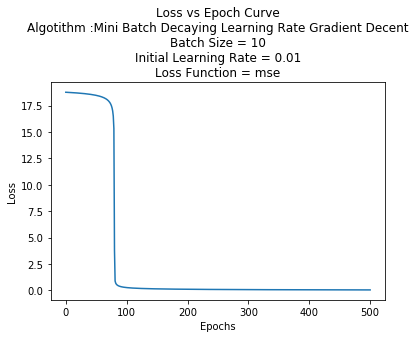

In [14]:
W,B = Decay_GD(x,y,500,10,'mse',0.01)

In [15]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-1.3742736419370061, -1.3687346718697628, -1.363145836358973, -1.3575060423935053, -1.3518141583775865, -1.3460690122390062, -1.3402693894178568, -1.3344140307265275, -1.3285016300708157, -1.3225308320210656, -1.3165002292211869, -1.3104083596222336, -1.3042537035259187, -1.2980346804219836, -1.2917496456017168, -1.2853968865281065, -1.2789746189410676, -1.2724809826739187, -1.2659140371547142, -1.2592717565631513, -1.2525520246105324, -1.245752628906579, -1.2388712548727414, -1.2319054791569355, -1.2248527624992676, -1.2177104419922158, -1.2104757226717506, -1.2031456683679109, -1.1957171917341916, -1.1881870433645754, -1.1805517998949107, -1.1728078509713009, -1.1649513849519135, -1.1569783731896968, -1.1488845527214537, -1.1406654071629121, -1.1323161455791537, -1.1238316790641145, -1.1152065947207117, -1.1064351266831751, -1.0975111237636108, -1.0884280132336468, -1.0791787601665244, -1.069755821661891, -1.0601510951505986, -1.0503558598246419, -1.0403607100510894, 

Loss after 1th epoch = 4.46204448710207

Loss after 2th epoch = 3.6510652237212518

Loss after 3th epoch = 3.262451283535511

Loss after 4th epoch = 3.0147412356794607

Loss after 5th epoch = 2.8359902873665503

Loss after 6th epoch = 2.697561520338696

Loss after 7th epoch = 2.5853304424143335

Loss after 8th epoch = 2.4913593064649833

Loss after 9th epoch = 2.410773323629509

Loss after 10th epoch = 2.340379104670184

Loss after 11th epoch = 2.277979191056847

Loss after 12th epoch = 2.222001594957932

Loss after 13th epoch = 2.171285851202704

Loss after 14th epoch = 2.124952719311328

Loss after 15th epoch = 2.0823212989842146

Loss after 16th epoch = 2.0428543528132392

Loss after 17th epoch = 2.0061211057964248

Loss after 18th epoch = 1.971771254566159

Loss after 19th epoch = 1.939516384505453

Loss after 20th epoch = 1.9091164114654233

Loss after 21th epoch = 1.8803695105434348

Loss after 22th epoch = 1.853104514563661

Loss after 23th epoch = 1.8271750937694946

Loss after

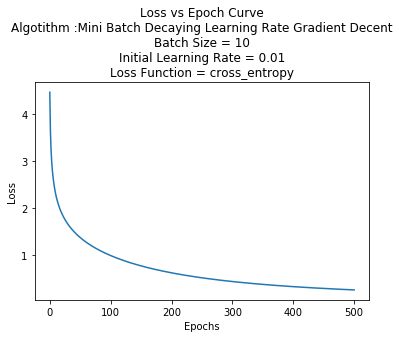

In [16]:
W,B = Decay_GD(x,y,500,10,'cross_entropy',0.01)

In [17]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[0.35100141907239019, 0.43903991359706279, 0.49728676881410461, 0.5421721935006425, 0.57914105894025025, 0.61076433977923139, 0.63848755337037943, 0.66321502986185721, 0.68555517882530403, 0.70593953997393499, 0.72468677084667854, 0.74203975365658392, 0.75818842158130928, 0.77328447957199942, 0.78745127269908133, 0.80079061903044002, 0.8133876723473954, 0.8253144653326937, 0.83663254472942061, 0.84739496671254122, 0.85764783201200101, 0.8674314837891528, 0.87678145429828458, 0.88572922163253553, 0.8943028209659859, 0.90252734295820625, 0.91042534368067596, 0.91801718445938341, 0.92532131568434028, 0.9323545154331675, 0.93913209136511189, 0.94566805253805453, 0.95197525642632441, 0.95806553535946393, 0.96394980578122258, 0.96963816308570183, 0.97513996428104799, 0.98046390032878583, 0.98561805968516558, 0.99060998431198788, 0.99544671921473582, 1.0001348563951427, 1.0046805739655649, 1.0090896710575226, 1.0133675990616628, 1.0175194896573931, 1.0215501800245008, 1.0254642

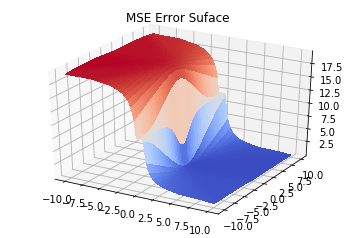

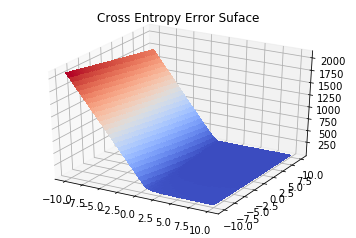

In [18]:
#Error Surface MSE
w = np.linspace(-10,10,num = 1000,dtype = np.float)
b = np.linspace(-10,10,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()